# The Three Body Problem  
Using Verlet intergration evolve a 3 body system for position and velocity.  
Calculate angular momentum of the bodies.  
Calculate total energy (potential and kinetic).  
### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $  

$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

### Functions

In [2]:
def Force(p1, p2, ma1, ma2):
    """This function calculates the gravitational force between masses. F = G(m+M)/r^2.
    The force is split into its x and y components using the angle between
    p1: an array holding the position of the position of planet in question.
    p2: an array holding the positions of all the planets.
    ma1: mass of the plant in question.
    ma2: an array holding the mass of all of th planets."""
    x_force = np.array([])
    y_force = np.array([])

    for i in range(len(p2)-1):
        vec = np.array([p2[i,0] - p1[0], p2[i,1] - p1[1]])
        sep_sqr = np.sum(vec**2)

        if p1.all() == p2[i].all():     #stops the code form comapring a planet with its self as this would produce an error that they are too close.
            #print("planet1 and planet2 are the same")
            continue
        else:
            pass
            
        if sep_sqr<0.1:
            raise ValueError (f"The planets are too close, so the numbers are blowing up planets {ma1} and {ma2[i]}")
        else:
            pass
        
        #force = - sc.G *(ma1 +ma2[i])/ sep_sqr     #calculates the force between the two bodies in  a direct line between the two.
        force =  - 1 *(ma1 *ma2[i])/ sep_sqr  
        
        ang = np.arctan2(vec[0],vec[1])     #calculates the angle from +y to the vector between the bodeis.
        if ang < 0:
            ang = ang + np.pi
        else:
            pass

        ang = ang % (np.pi/2)     #changes the angle to the interior of a right angle triangle to allow for the calculation of x and y components of force.

        if vec[0]<0 and vec[1]<0:
            # ad=fy     op=fy
            fx = force*np.sin(ang)
            fy = force*np.cos(ang)
            
            
        elif vec[0]<0 and vec[1]>0:
            #ad=fx     op=fy
            fx = force*np.cos(ang)
            fy = force*np.sin(ang)
            
        elif vec[0]>0 and vec[1]<0:
            #ad=fx     op=fy
            fx = force*np.cos(ang)
            fy = force*np.sin(ang)
            
        elif vec[0]>0 and vec[1]>0:
            #ad=fy     op=fx
            fx = force*np.sin(ang)
            fy = force*np.cos(ang)

        elif vec[0] == 0:
            #fy=force     fx=0.     points are equal in x axis
            fx = 0
            fy = force

        elif vec[1] == 1:
            #fx=force     fy=0.     points are equal in y axis
            fx = force
            fy = 0

        else:
            raise ValueError (f"One of the planets must have disapeared as {ma1} and {ma2[i]} are not anywhere in relation to eachother")     #Shouldnt ever be needed, but who knows.

        x_force = np.append(x_force, fx)
        y_force = np.append(y_force, fy)


    x_force = np.sum(x_force)
    y_force = np.sum(y_force)
    print(f"x {x_force},,,,,, y {y_force}")

    
    return  x_force, y_force
        

In [3]:
def Verlet(i_pos, i_vel, ma, t_s):
    """A function cintaining a single step of a verlet intergrator.
    Calls to the force function when a force is required calculating.
    Returns new velocities and new positions in arrays.
    IN:
        i_pos: an array holding the x componet of each planets location at the begining of a step.
        i_vel: an array holding the y componet of each planets velocity at the begining of a step.
        ma: an array holding the masses of all the planets.
        t_s: time step.
    OUT:
        new_pos: an array of the nwe positions (at the end of the timestep), They are in the form [x,y]
        new_vel: an array of the new velocities ( at the end of the timestep), They are in the form [x,y]"""

    temp_vel = np.array([])     #Temporay array that hold  the itermediary velocities
    
    new_pos = np.array([])     #arrays to hod the position and velocity at the end of a step
    new_vel = np.array([])
    
    for i in range(len(ma)):     #For calulating the velocity half step
        v_of_i = i_vel[i]
        loc_of_i = i_pos[i]
        ma_of_i = ma[i]
        
        f_x, f_y = Force(p1 = loc_of_i, p2 = i_pos, ma1 = ma_of_i, ma2 = ma)
        a_x = f_x/ma_of_i
        a_y = f_y/ma_of_i
        
        vx_half = v_of_i[0] + 0.5*(t_s*a_x)
        vy_half = v_of_i[1] + 0.5*(t_s*a_y)
        #print(f"vx_half {vx_half}. vy_half {vy_half}")
        #print(f"vx_half shape {vx_half.shape}. vy_half shape {vy_half.shape}")
        if temp_vel.shape == (0,):
            temp_vel = np.array([vx_half, vy_half])
        else:
            temp_vel = np.vstack((temp_vel, np.array([vx_half, vy_half])))
        

    for p in range(len(ma)):     #For calculating the position and velocity at the end of a step
        v_of_i = temp_vel[p]
        loc_of_i = i_pos[p]
        ma_of_i = ma[p]
        
        f_x, f_y = Force(p1 = loc_of_i, p2 = i_pos, ma1 = ma_of_i, ma2 = ma)
        a_x = f_x/ma_of_i
        a_y = f_y/ma_of_i

        x_whole = loc_of_i[0] + t_s * v_of_i[0]
        y_whole = loc_of_i[1] + t_s * v_of_i[1]

        vx_whole = v_of_i[0] + 0.5*(t_s*a_x)
        vy_whole = v_of_i[1] + 0.5*(t_s*a_y)

        
        #new_pos = np.vstack((new_pos, np.array([x_whole, y_whole])))
        #new_vel = np.vstack((new_vel, np.array([vx_whole ,vy_whole])))


        if new_pos.shape == (0,):
            new_pos = np.array([x_whole, y_whole])
            new_vel = np.array([vx_whole ,vy_whole])
        else:
            new_pos = np.vstack((new_pos, np.array([x_whole, y_whole])))
            new_vel = np.vstack((new_vel, np.array([vx_whole ,vy_whole])))
            #print(new_pos)
            
    return new_pos, new_vel

In [4]:
time_step = 0.5
no_steps = 10

In [5]:
masses = np.array([1,1])
initial_positions = np.array([[0.0,0.0],[1.0,0.0]])
initial_velociteis = np.array([[0.0,0.0],[0.0,10.0]])

 initial_positions [[0. 0.]
 [1. 0.]],,,,,initial_velociteis [[ 0.  0.]
 [ 0. 10.]]
x 0.0,,,,,, y 0.0
x 0.0,,,,,, y 0.0
x 0.0,,,,,, y 0.0
x 0.0,,,,,, y 0.0
pos1 [[0. 0.]
 [1. 5.]]
x 0.0,,,,,, y 0.0
x -0.007542928274545528,,,,,, y -0.0377146413727277
x 0.0,,,,,, y 0.0
x -0.007542928274545528,,,,,, y -0.0377146413727277
pos1 [[0.         0.        ]
 [0.99905713 9.99528567]]
x 0.0,,,,,, y 0.0
x -0.0009856635909606015,,,,,, y -0.009861287038603481
x 0.0,,,,,, y 0.0
x -0.0009856635909606015,,,,,, y -0.009861287038603481
pos1 [[ 0.          0.        ]
 [ 0.99704819 14.98462435]]
x 0.0,,,,,, y 0.0
x -0.0002943749142650541,,,,,, y -0.004424156760614962
x 0.0,,,,,, y 0.0
x -0.0002943749142650541,,,,,, y -0.004424156760614962
pos1 [[ 0.          0.        ]
 [ 0.99487925 19.97217735]]
x 0.0,,,,,, y 0.0
x -0.00012441698458409272,,,,,, y -0.0024976680167820477
x 0.0,,,,,, y 0.0
x -0.00012441698458409272,,,,,, y -0.0024976680167820477
pos1 [[ 0.          0.        ]
 [ 0.99265796 24.95886512]]
x 

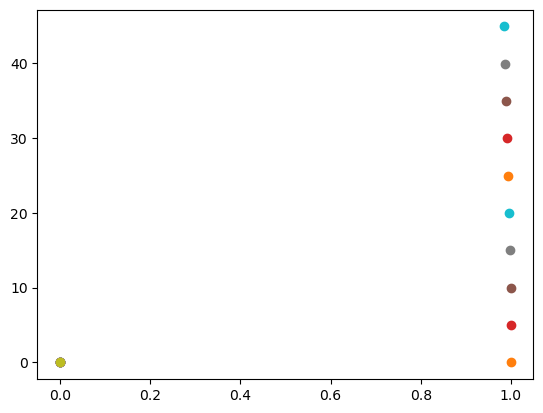

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

pos = initial_positions
vel = initial_velociteis
print(f" initial_positions {initial_positions},,,,,initial_velociteis {initial_velociteis}")
for i in range(no_steps):

    for u in range(len(pos)):
       #print(f"pos[u,0] {pos[u,0]}, pos[u,1] {pos[u,1]}")
        ax.scatter(pos[u,0], pos[u,1])
        #print(f"u {u}")

    pos, vel = Verlet(i_pos = pos, i_vel = vel, ma = masses, t_s = time_step)
    #print(f"i {i}")
    #print(f"pos{pos}")
    #print(f"shape of pos {pos.shape}")
    #print(f"pos {pos}")
    print(f"pos{u} {pos}")

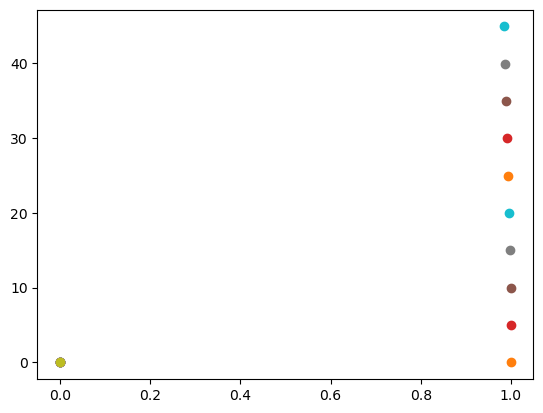

In [7]:
fig

In [8]:
help(Verlet)

Help on function Verlet in module __main__:

Verlet(i_pos, i_vel, ma, t_s)
    A function cintaining a single step of a verlet intergrator.
    Calls to the force function when a force is required calculating.
    Returns new velocities and new positions in arrays.
    IN:
        i_pos: an array holding the x componet of each planets location at the begining of a step.
        i_vel: an array holding the y componet of each planets velocity at the begining of a step.
        ma: an array holding the masses of all the planets.
        t_s: time step.
    OUT:
        new_pos: an array of the nwe positions (at the end of the timestep), They are in the form [x,y]
        new_vel: an array of the new velocities ( at the end of the timestep), They are in the form [x,y]

